In [1]:
import pandas as pd
rway_img_df = pd.read_csv("collection_images_download.csv")
# EXTRACT BRAND FROM IMAGE NAME
rway_img_df['brand'] = rway_img_df['image_name'].str.lower()
rway_img_df['brand'] = rway_img_df['brand'].str.split('couture').str[0]
rway_img_df['brand'] = rway_img_df['brand'].str.split('ready-to-wear').str[0]
rway_img_df['brand'] = rway_img_df['brand'].str.split('menswear').str[0]
rway_img_df['brand'] = rway_img_df['brand'].str.replace("-", " ")
rway_img_df['brand'] = rway_img_df['brand'].str.strip()

# subset rway_img_df where brand cointains versage,hermes
#brand_keywords = ['rick owens', 'louis vuitton', 'versace', 'giorgio armani', 'hermes', 'dries van noten', 'chanel']
brand_keywords = ['rick owens', 'dries van noten','versace', 'louis vuitton','chanel','giorgio armani']

data = rway_img_df[rway_img_df['brand'].isin(brand_keywords)]

# rename brand in target column
data['target'] = data['brand']
# factorized 'brand' using pandas
data['target'] = pd.factorize(data['target'])[0]


/var/folders/3c/t3n4ptk97wl0rt09z81znxsw0000gn/T/ipykernel_1661/3551661527.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['brand']
/var/folders/3c/t3n4ptk97wl0rt09z81znxsw0000gn/T/ipykernel_1661/3551661527.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = pd.factorize(data['target'])[0]


In [25]:
# Calculate the value counts of each brand in the 'brand' column
brand_counts = rway_img_df['brand'].value_counts()

# Print the brand names with count greater than 800
for brand, count in brand_counts.items():
    # return the top 10 brand with higer number of images
    if count > 800:
        print(brand, count)

#! here the list of brand to predict without any class imbalance
#* ['rick owens', 'yohji yamamoto', 'louis vuitton', 'versace', 'giorgio armani', 'hermes', 'dries van noten', 'chanel']


valentino 1140
fendi 940
rick owens 880
yohji yamamoto 880
louis vuitton 880
versace 854
giorgio armani 841
hermes 840
dries van noten 840
chanel 840


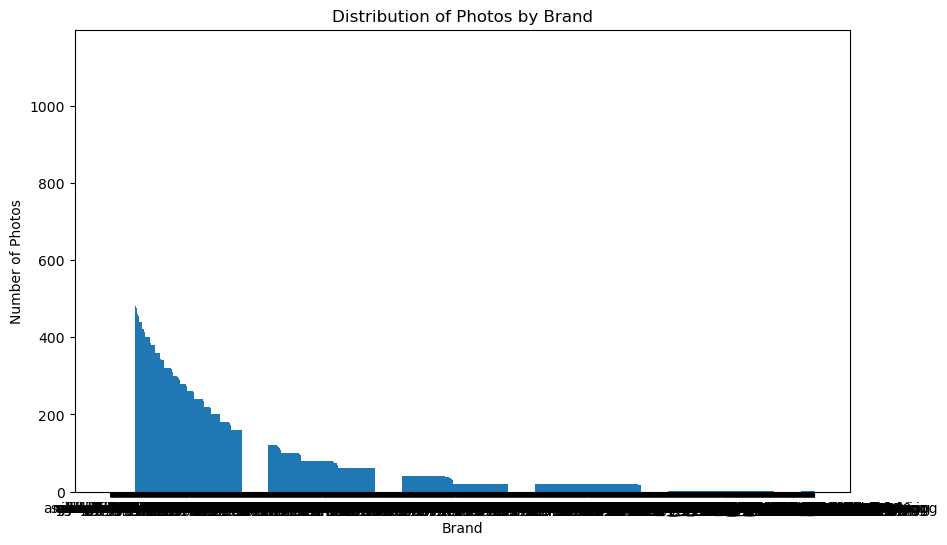

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the CSV file

# Get the number of photos for each brand
brand_counts = rway_img_df['brand'].value_counts()

# Sort the brands by the number of photos
brand_counts = brand_counts.sort_values(ascending=False)

# Get the x and y coordinates for the plot
x = brand_counts.index.to_numpy()
y = brand_counts.to_numpy()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.xlabel('Brand')
plt.ylabel('Number of Photos')
plt.title('Distribution of Photos by Brand')
plt.show()

In [22]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Attention

   
# Load the image data and labels

# Split the data into training and validation sets
X_train_paths, X_val_paths, y_train, y_val = train_test_split(
    data['image_path'],
    data['target'],
    test_size=0.2,
    random_state=1234
)

# Define image dimensions (img_height and img_width) to resize the images during preprocessing.
img_height, img_width = 224, 224

# Map the brand labels in y_train and y_val to their corresponding integer labels using the brand_to_label dictionary.
brand_to_label = {brand: i for i, brand in enumerate(np.unique(data['target']))}

# Calculate the number of classes (num_classes) based on the unique labels.
num_classes = len(brand_to_label)

# Define the preprocess_image function to load, resize, and normalize the pixel values of the images.
def preprocess_image(image_path):
    image_path = './imgs/images/images/' + image_path  
    image = load_img(image_path, target_size=(img_height, img_width))
    image = img_to_array(image)
    image = image / 255.0 
    return image

# Preprocess the images in X_train and X_val by applying the preprocess_image function to each image path.
X_train = np.array([preprocess_image(path) for path in X_train_paths])
X_val = np.array([preprocess_image(path) for path in X_val_paths])

#

In [24]:
X_train

array([[[[0.67058825, 0.23921569, 0.10196079],
         [0.67058825, 0.28627452, 0.14901961],
         [0.7882353 , 0.4627451 , 0.32941177],
         ...,
         [0.48235294, 0.5411765 , 0.5529412 ],
         [0.5058824 , 0.56078434, 0.57254905],
         [0.59607846, 0.61960787, 0.6039216 ]],

        [[0.7764706 , 0.44705883, 0.3372549 ],
         [1.        , 0.7372549 , 0.6313726 ],
         [0.4627451 , 0.23921569, 0.13333334],
         ...,
         [0.41568628, 0.47058824, 0.48235294],
         [0.49019608, 0.54509807, 0.5568628 ],
         [0.5647059 , 0.6       , 0.59607846]],

        [[0.5058824 , 0.23921569, 0.19607843],
         [0.84313726, 0.6156863 , 0.57254905],
         [0.24705882, 0.07843138, 0.04313726],
         ...,
         [0.4392157 , 0.49411765, 0.49803922],
         [0.49803922, 0.5411765 , 0.54901963],
         [0.5529412 , 0.5921569 , 0.6       ]],

        ...,

        [[0.9764706 , 0.9764706 , 0.9764706 ],
         [0.98039216, 0.98039216, 0.98039216]

In [ ]:
 Convert the integer labels in y_train and y_val to one-hot encoded vectors using tf.keras.utils.to_categorical.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)
